<a href="https://colab.research.google.com/github/AlbertoVentura8/AnalisisDataset/blob/main/MarchMad_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Permiso para exportar desde Drive
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Voy a cargar las librerías que vamos a usar a lo largo del EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [6]:
#Hacemos la carga del dataset. Dataset previamente subido a GoogleColab.
March_Madness_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1VRodxJqhnl2IK63lmumPhLwhRDe6Y2Gu')

In [7]:
# Para ver que la carga ha sido correcta, cargamos el head del mismo
March_Madness_df.head()


,Unnamed: 0,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,...,SFOR,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion
0,0,2015,Kentucky,Southeastern Conference (SEC),62.4,121.3,84.4,17.7,19.6,0.515116,...,20.03,5.69,6.08,27.92,30.08,18.01,13.00,10.99,36.9,No Llega
1,1,2021,Gonzaga,West Coast Conference (WCC),73.8,126.4,89.9,14.4,18.0,0.610178,...,6.54,22.61,11.41,23.99,18.56,13.28,24.63,19.49,36.5,No
2,2,2024,UConn,Big East Conference,64.6,127.5,91.1,18.6,17.5,0.569075,...,20.29,13.83,14.05,25.88,17.21,20.98,20.55,15.33,36.4,Si
3,3,2008,Kansas,Big 12 Conference,66.8,120.9,85.7,18.6,17.5,0.565912,...,22.11,5.59,5.77,26.38,28.48,18.37,13.90,12.87,35.2,Si
4,4,2019,Virginia,Atlantic Coast Conference (ACC),59.4,123.4,89.2,21.0,18.8,0.551800,...,14.67,8.82,8.61,23.45,26.61,18.51,17.84,13.59,34.2,Si


In [8]:
#Eliminar columna Unnamed0
del March_Madness_df['Unnamed: 0']
March_Madness_df.head()

,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,...,SFOR,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion
0,2015,Kentucky,Southeastern Conference (SEC),62.4,121.3,84.4,17.7,19.6,0.515116,0.162529,...,20.03,5.69,6.08,27.92,30.08,18.01,13.00,10.99,36.9,No Llega
1,2021,Gonzaga,West Coast Conference (WCC),73.8,126.4,89.9,14.4,18.0,0.610178,0.161279,...,6.54,22.61,11.41,23.99,18.56,13.28,24.63,19.49,36.5,No
2,2024,UConn,Big East Conference,64.6,127.5,91.1,18.6,17.5,0.569075,0.144997,...,20.29,13.83,14.05,25.88,17.21,20.98,20.55,15.33,36.4,Si
3,2008,Kansas,Big 12 Conference,66.8,120.9,85.7,18.6,17.5,0.565912,0.191079,...,22.11,5.59,5.77,26.38,28.48,18.37,13.90,12.87,35.2,Si
4,2019,Virginia,Atlantic Coast Conference (ACC),59.4,123.4,89.2,21.0,18.8,0.551800,0.147067,...,14.67,8.82,8.61,23.45,26.61,18.51,17.84,13.59,34.2,Si


**Vamos a empezar este bloque de Análisis Exploratorio del Dataset (EDA)**



1.   **En este primer bloque, vamos a echar un vistazo por las variables, y su correlación, con la variable objetivo que es si un equipo es campeón, finalista o no llega a la final.**





In [9]:
#Vamos a ver las columnas del dataset, y el tipo de datos que contienen, en su mayoría, son datos numéricos, excepto alguna columna de texto
March_Madness_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 0 to 6766
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Season                           6767 non-null   int64  
 1   Team Name                        6767 non-null   object 
 2   Conference                       6767 non-null   object 
 3   Adjusted Temo                    6767 non-null   float64
 4   Adjusted Offensive Efficiency    6767 non-null   float64
 5   Adjusted Defensive Efficiency    6767 non-null   float64
 6   Avg Possession Length (Offense)  6767 non-null   float64
 7   Avg Possession Length (Defense)  6767 non-null   float64
 8   eFGPct                           6767 non-null   float64
 9   TOPct                            6767 non-null   float64
 10  ORPct                            6767 non-null   float64
 11  OffFT                            6767 non-null   float64
 12  DefFT               

In [10]:
# Para poder usar la columna Is_Champion como variable objetivo y crear correlaciones, lo más fácil va a ser darle un valor a cada texto
# Convertir la columna 'Is_Champion' en valores numéricos, para poder ver correlaciones
March_Madness_df['Is_Champion_Num'] = March_Madness_df['Is_Champion'].map({
    'Si': 2,
    'No': 1,  # Usamos 1 para finalista si existiera
    'No Llega': 0
})
March_Madness_df.head()

,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,...,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion,Is_Champion_Num
0,2015,Kentucky,Southeastern Conference (SEC),62.4,121.3,84.4,17.7,19.6,0.515116,0.162529,...,5.69,6.08,27.92,30.08,18.01,13.00,10.99,36.9,No Llega,0
1,2021,Gonzaga,West Coast Conference (WCC),73.8,126.4,89.9,14.4,18.0,0.610178,0.161279,...,22.61,11.41,23.99,18.56,13.28,24.63,19.49,36.5,No,1
2,2024,UConn,Big East Conference,64.6,127.5,91.1,18.6,17.5,0.569075,0.144997,...,13.83,14.05,25.88,17.21,20.98,20.55,15.33,36.4,Si,2
3,2008,Kansas,Big 12 Conference,66.8,120.9,85.7,18.6,17.5,0.565912,0.191079,...,5.59,5.77,26.38,28.48,18.37,13.90,12.87,35.2,Si,2
4,2019,Virginia,Atlantic Coast Conference (ACC),59.4,123.4,89.2,21.0,18.8,0.551800,0.147067,...,8.82,8.61,23.45,26.61,18.51,17.84,13.59,34.2,Si,2


In [11]:
# Vamos a tener una vista general de todas las variables, y de los principales puntos de cada una: Media, Desviación, Mínimo, Cuartiles y Máximo.
March_Madness_df.describe()

,Season,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,ORPct,OffFT,...,SFOR,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion_Num
count,6767.00000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,...,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000
mean,2014.70563,66.440166,103.826097,103.564312,17.720334,17.655771,0.495914,0.195299,0.305426,19.796984,...,17.700078,11.364473,8.237172,26.274451,24.014259,19.347018,16.103468,14.095132,0.261785,0.008128
std,5.76618,3.199053,7.363501,6.440918,1.446903,1.004610,0.036212,0.039395,0.045756,2.715268,...,5.890889,4.550049,3.608478,4.567497,4.118242,3.629055,3.302148,3.386254,11.989047,0.115687
min,2005.00000,51.600000,71.500000,84.100000,0.000000,0.000000,0.000000,0.119000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.100000,0.000000
25%,2010.00000,64.400000,98.800000,99.200000,16.900000,17.200000,0.475996,0.177526,0.275929,18.002456,...,13.490000,8.060000,5.840000,23.430000,21.500000,16.985000,13.990000,12.150000,-8.400000,0.000000
50%,2015.00000,66.400000,103.700000,103.700000,17.700000,17.600000,0.496714,0.192814,0.307282,19.839800,...,17.370000,10.780000,7.690000,26.030000,23.880000,19.160000,15.920000,13.810000,-0.500000,0.000000
75%,2020.00000,68.600000,108.800000,108.300000,18.500000,18.100000,0.516998,0.209642,0.337140,21.609500,...,21.610000,13.975000,9.990000,28.880000,26.430000,21.595000,17.950000,15.740000,8.700000,0.000000
max,2024.00000,89.700000,129.000000,125.000000,23.800000,21.100000,0.610178,1.000000,0.452567,32.282300,...,99.980000,39.840000,99.980000,99.960000,99.960000,42.080000,80.800000,99.970000,36.900000,2.000000


In [12]:
# Vamos a comprobar que la limpieza está hecha correctamente, y que no tenemos valores nulos o vacios
# Comprobamos que no tenemos valores nulos
March_Madness_df.isna().sum()


,0
Season,0
Team Name,0
Conference,0
Adjusted Temo,0
Adjusted Offensive Efficiency,0
Adjusted Defensive Efficiency,0
Avg Possession Length (Offense),0
Avg Possession Length (Defense),0
eFGPct,0
TOPct,0


In [13]:
#Comprobamos que no tiene valores vacios
March_Madness_df.isnull().sum()


,0
Season,0
Team Name,0
Conference,0
Adjusted Temo,0
Adjusted Offensive Efficiency,0
Adjusted Defensive Efficiency,0
Avg Possession Length (Offense),0
Avg Possession Length (Defense),0
eFGPct,0
TOPct,0


In [14]:
# Viendo que está todo en orden para empezar a trabajar, vamos con una vista un poco más estadística del dataset
March_Madness_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,6767.0,2014.705630,5.766180,2005.000000,2010.000000,2015.000000,2020.000000,2024.000000
Adjusted Temo,6767.0,66.440166,3.199053,51.600000,64.400000,66.400000,68.600000,89.700000
Adjusted Offensive Efficiency,6767.0,103.826097,7.363501,71.500000,98.800000,103.700000,108.800000,129.000000
Adjusted Defensive Efficiency,6767.0,103.564312,6.440918,84.100000,99.200000,103.700000,108.300000,125.000000
Avg Possession Length (Offense),6767.0,17.720334,1.446903,0.000000,16.900000,17.700000,18.500000,23.800000
Avg Possession Length (Defense),6767.0,17.655771,1.004610,0.000000,17.200000,17.600000,18.100000,21.100000
eFGPct,6767.0,0.495914,0.036212,0.000000,0.475996,0.496714,0.516998,0.610178
TOPct,6767.0,0.195299,0.039395,0.119000,0.177526,0.192814,0.209642,1.000000
ORPct,6767.0,0.305426,0.045756,0.000000,0.275929,0.307282,0.337140,0.452567
OffFT,6767.0,19.796984,2.715268,0.000000,18.002456,19.839800,21.609500,32.282300


In [15]:
# Vamos a ver todos los campeones que ha habido, ordenandolos por temporada
Campeones_df = March_Madness_df[March_Madness_df['Is_Champion'] == 'Si']
Campeones_df.sort_values('Season', ascending=False)

,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,...,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion,Is_Champion_Num
2,2024,UConn,Big East Conference,64.6,127.5,91.1,18.6,17.5,0.569075,0.144997,...,13.83,14.05,25.88,17.21,20.98,20.55,15.33,36.4,Si,2
40,2023,UConn,Big East Conference,66.6,120.8,90.9,18.2,17.0,0.539434,0.188662,...,12.81,8.55,34.24,18.35,19.04,16.78,11.53,29.9,Si,2
75,2022,Kansas,Big 12 Conference,69.3,119.2,91.7,16.4,18.0,0.537819,0.172428,...,9.13,6.39,26.96,26.49,21.70,12.13,12.67,27.5,Si,2
5,2021,Baylor,Big 12 Conference,67.4,125.0,91.1,17.0,17.6,0.565483,0.165283,...,7.14,5.21,30.09,27.69,14.23,16.34,11.65,33.9,Si,2
4,2019,Virginia,Atlantic Coast Conference (ACC),59.4,123.4,89.2,21.0,18.8,0.551800,0.147067,...,8.82,8.61,23.45,26.61,18.51,17.84,13.59,34.2,Si,2
7,2018,Villanova,Big East Conference,68.7,127.8,94.0,17.9,16.6,0.595082,0.150455,...,9.99,4.45,29.62,19.16,19.99,17.28,13.94,33.8,Si,2
59,2017,North Carolina,Atlantic Coast Conference (ACC),71.3,120.7,92.5,15.4,17.7,0.516543,0.162325,...,10.21,3.95,31.72,22.70,16.88,15.72,12.99,28.2,Si,2
18,2016,Villanova,Big East Conference,66.0,122.8,90.8,18.4,17.1,0.560525,0.163235,...,8.93,8.75,34.40,18.90,23.32,13.22,10.16,32.0,Si,2
15,2015,Duke,Atlantic Coast Conference (ACC),65.8,124.5,92.0,18.1,18.1,0.566180,0.162675,...,6.44,5.41,26.36,28.28,17.03,13.69,14.65,32.5,Si,2
5982,2014,Central Connecticut,Northeast Conference (NEC),68.4,97.4,111.1,16.1,17.6,0.481460,0.198717,...,4.49,7.79,28.77,25.67,17.67,11.52,16.37,-13.7,Si,2


In [16]:
#Vamos a ver ahora los subcampeones
Campeones_df = March_Madness_df[March_Madness_df['Is_Champion'] == 'No']
Campeones_df.sort_values('Season', ascending=False)

,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,...,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion,Is_Champion_Num
30,2024,Purdue,Big Ten Conference (Big 10),67.0,125.2,94.6,18.0,17.2,0.558099,0.164428,...,5.01,7.96,34.17,17.73,15.61,11.30,21.16,30.6,No,1
364,2023,San Diego State,Mountain West Conference (MW),65.7,110.8,90.4,17.5,18.5,0.493132,0.172801,...,6.61,5.20,30.47,22.78,20.42,12.92,13.41,20.4,No,1
381,2022,North Carolina,Atlantic Coast Conference (ACC),70.2,114.4,94.3,17.0,17.1,0.514736,0.164362,...,3.48,6.10,36.59,21.05,15.48,11.71,15.16,20.1,No,1
1,2021,Gonzaga,West Coast Conference (WCC),73.8,126.4,89.9,14.4,18.0,0.610178,0.161279,...,22.61,11.41,23.99,18.56,13.28,24.63,19.49,36.5,No,1
36,2019,Texas Tech,Big 12 Conference,66.6,114.1,84.1,18.3,17.6,0.534834,0.177525,...,5.05,1.71,27.20,26.29,18.61,16.52,11.34,30.0,No,1
172,2018,Michigan,Big Ten Conference (Big 10),64.9,114.7,90.5,18.6,18.0,0.539069,0.140315,...,10.19,10.82,31.57,14.19,22.03,15.73,16.44,24.2,No,1
17,2017,Gonzaga,West Coast Conference (WCC),70.1,118.4,86.3,15.9,18.1,0.566418,0.162242,...,7.12,8.11,29.03,27.18,11.99,10.96,20.78,32.1,No,1
41,2016,North Carolina,Atlantic Coast Conference (ACC),70.5,124.4,94.6,15.5,18.6,0.525966,0.153771,...,6.02,6.90,34.79,25.04,15.60,11.27,13.30,29.8,No,1
6,2015,Wisconsin,Big Ten Conference (Big 10),58.7,129.0,95.2,21.8,18.3,0.547518,0.123664,...,9.31,11.50,33.03,20.78,22.11,11.68,12.40,33.8,No,1
240,2014,Kentucky,Southeastern Conference (SEC),64.0,118.3,95.8,17.9,18.5,0.499548,0.181034,...,8.03,7.55,25.13,33.65,15.50,13.60,12.12,22.5,No,1


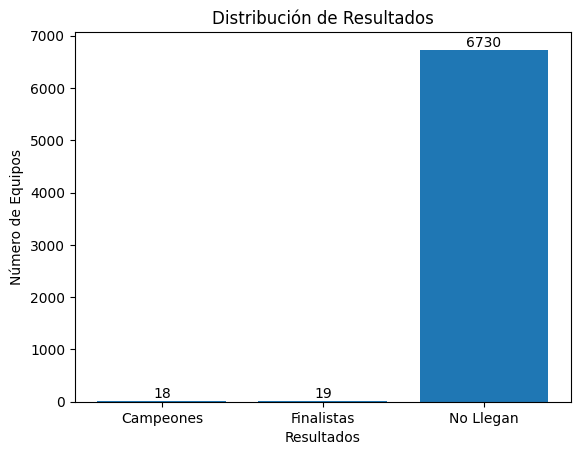

Campeones: 0.27%
Finalistas: 0.28%
No Llegan: 99.45%


In [17]:
# Vamos a empezar con un gráfico donde se vea el % de campeones, de finalistas y de los que no llegan
# Calcular el número total de equipos
total_equipos = len(March_Madness_df)

# Calcular el número de equipos con cada resultado
campeones = (March_Madness_df['Is_Champion'] == 'Si').sum()
finalistas = (March_Madness_df['Is_Champion'] == 'No').sum()
no_llegan = (March_Madness_df['Is_Champion'] == 'No Llega').sum()

# Crear una lista con los resultados
resultados = [campeones, finalistas, no_llegan]

# Crear una lista de Categorias para las barras
Categorias = ['Campeones', 'Finalistas', 'No Llegan']

# Crear el gráfico de barras
plt.bar(Categorias, resultados)

#Mostrar el numero total de cada categoria en el grafico
for i, v in enumerate(resultados):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Configurar el título y las Categorias de los ejes
plt.title('Distribución de Resultados')
plt.xlabel('Resultados')
plt.ylabel('Número de Equipos')

# Mostrar el gráfico
plt.show()


# Mostrar el % que supone
print(f"Campeones: {campeones / total_equipos * 100:.2f}%")
print(f"Finalistas: {finalistas / total_equipos * 100:.2f}%")
print(f"No Llegan: {no_llegan / total_equipos * 100:.2f}%")

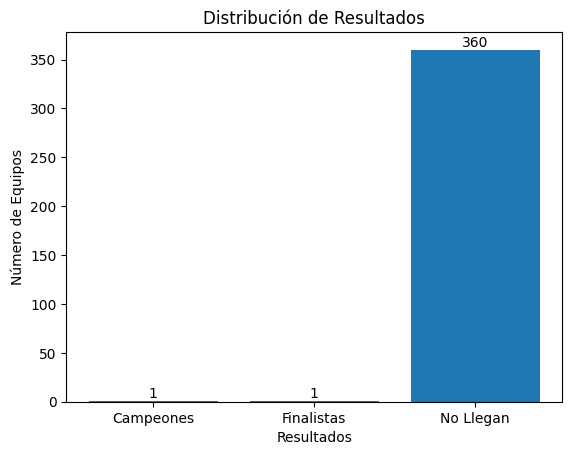

Campeones: 0.28%
Finalistas: 0.28%
No Llegan: 99.45%


In [18]:
# Hacemos lo mismo solo para el 2024
# Vamos a empezar con un gráfico donde se vea el % de campeones, de finalistas y de los que no llegan
# Calcular el número total de equipos
March_Madness_2024 = March_Madness_df[March_Madness_df['Season'] == 2024]
total_equipos = len(March_Madness_2024)

# Calcular el número de equipos con cada resultado
campeones = (March_Madness_2024['Is_Champion'] == 'Si').sum()
finalistas = (March_Madness_2024['Is_Champion'] == 'No').sum()
no_llegan = (March_Madness_2024['Is_Champion'] == 'No Llega').sum()

# Crear una lista con los resultados
resultados = [campeones, finalistas, no_llegan]

# Crear una lista de Categorias para las barras
Categorias = ['Campeones', 'Finalistas', 'No Llegan']

# Crear el gráfico de barras
plt.bar(Categorias, resultados)

#Mostrar el numero total de cada categoria en el grafico
for i, v in enumerate(resultados):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Configurar el título y las Categorias de los ejes
plt.title('Distribución de Resultados')
plt.xlabel('Resultados')
plt.ylabel('Número de Equipos')

# Mostrar el gráfico
plt.show()


# Mostrar el % que supone
print(f"Campeones: {campeones / total_equipos * 100:.2f}%")
print(f"Finalistas: {finalistas / total_equipos * 100:.2f}%")
print(f"No Llegan: {no_llegan / total_equipos * 100:.2f}%")

In [19]:
# Listado con los equipos que han sido campeones y otro con subcampeones
Campeones_df = March_Madness_df[March_Madness_df['Is_Champion'] == 'Si']
Finalistas_df = March_Madness_df[March_Madness_df['Is_Champion'] == 'No']

#Sumamos los Si y los No por equipo para ver quienes han ganado mas
Campeones_df = Campeones_df.groupby('Team Name').size().reset_index(name='Campeones')
Finalistas_df = Finalistas_df.groupby('Team Name').size().reset_index(name='Finalistas')



In [20]:
# Hacemos el print
Campeones_df.sort_values('Campeones', ascending=False)


,Team Name,Campeones
6,North Carolina,3
1,Central Connecticut,2
2,Duke,2
3,Florida,2
4,Kansas,2
7,UConn,2
8,Villanova,2
0,Baylor,1
5,Kentucky,1
9,Virginia,1


In [21]:
Finalistas_df.sort_values('Finalistas', ascending=False)

,Team Name,Finalistas
0,Butler,2
1,Gonzaga,2
6,Michigan,2
8,North Carolina,2
2,Illinois,1
3,Kansas,1
4,Kentucky,1
5,Memphis,1
7,Michigan State,1
9,Ohio State,1


In [22]:
# Obtener los equipos finalistas y campeones
equipos_finalistas = Finalistas_df['Team Name']
equipos_campeones = Campeones_df['Team Name']

# Unir las listas de equipos
todos_los_equipos = pd.concat([equipos_finalistas, equipos_campeones])

#Eliminar duplicados
todos_los_equipos = todos_los_equipos.drop_duplicates()

print(f"Listado de todos los equipos (incluyendo duplicados): {todos_los_equipos}")

# Print solamente con el numero total
print(f"Número total de equipos: {len(todos_los_equipos)}")

# Esto representa un porcentaje sobre el total de
print(f"Porcentaje de equipos: {len(todos_los_equipos) / len(March_Madness_df['Team Name'].unique()) * 100:.2f}%")

Listado de todos los equipos (incluyendo duplicados): 0                  Butler
1                 Gonzaga
2                Illinois
3                  Kansas
4                Kentucky
5                 Memphis
6                Michigan
7          Michigan State
8          North Carolina
9              Ohio State
10                 Purdue
11        San Diego State
12             Texas Tech
13                   UCLA
14              Wisconsin
0                  Baylor
1     Central Connecticut
2                    Duke
3                 Florida
7                   UConn
8               Villanova
9                Virginia
Name: Team Name, dtype: object
Número total de equipos: 22
Porcentaje de equipos: 6.08%


In [23]:
# Cuantos coinciden
Campeones_df = pd.merge(Campeones_df, Finalistas_df, on='Team Name')
Campeones_df.sort_values('Campeones', ascending=False)

,Team Name,Campeones,Finalistas
2,North Carolina,3,2
0,Kansas,2,1
1,Kentucky,1,1


In [24]:
# Seleccionar solo las columnas numéricas
Col_Num = March_Madness_df.select_dtypes(include=['number'])

# Calcular el sesgo (skew) para todas las columnas numéricas
skew_values = Col_Num.skew()

# Ordenar los valores de sesgo en orden descendente
sorted_skew_values = skew_values.sort_values(ascending=False)

# Mostrar las columnas con las mayores desviaciones
print(sorted_skew_values)

OppBlockPct                        19.071165
Is_Champion_Num                    15.353062
TOPct                              12.624503
OppFG3Pct                           9.761151
PGDR                                7.472410
DE                                  4.681378
OppFG2Pct                           3.486461
PGOR                                3.378085
OppFTPct                            1.614977
SGDR                                1.354442
SGOR                                0.918954
PFDR                                0.720005
SFOR                                0.706509
CenterDR                            0.585774
BlockPct                            0.506792
EffectiveHeight                     0.261367
AdjEM                               0.164012
Net Rating                          0.163892
SFDR                                0.091923
CenterOR                            0.050739
AdjTempo                            0.020419
Adjusted Temo                       0.019699
AdjOE     

In [25]:
# Sacar el skew value de todo lo que contenga Height, pero limitando sus valores por debajo de 10
# Filtrar las columnas que contienen 'Height' en su nombre
height_columns = [col for col in Col_Num.columns if 'Height' in col]

# Crear un diccionario para almacenar los skew values de cada columna
skew_values = {}

# Iterar sobre las columnas filtradas
for col in height_columns:
    # Filtrar los valores de la columna que sean menores que 10
    filtro_valores = Col_Num[col][(Col_Num[col] >= -10) & (Col_Num[col] <= 10)]

    # Calcular el skew (asimetría) de los valores filtrados
    skew_value = filtro_valores.skew()  # Asegurarse de eliminar NaN para evitar errores

    # Guardar el skew value en el diccionario
    skew_values[col] = skew_value

# Mostrar los valores de skew de cada columna que contiene 'Height'
print("Skew values for columns containing 'Height' (values < -10):")
for col, skew_value in skew_values.items():
    print(f"{col}: {skew_value}")

Skew values for columns containing 'Height' (values < -10):
AvgHeight: 0.0
CenterHeight: 0.5758808659738957
PFHeight: 0.010646804940561054
SFHeight: 0.014653528162139624
SGHeight: -0.12014871362824206
PGHeight: -0.40037896253865257
EffectiveHeight: 0.26136741318304074


Esto, nos informa de que variables son las menos simétricas. Las que tienen un skew positivo, tienen más valores hacia la derecha, y los valores negativos hacia la izquierda. Vemos por ejemplo que la columna Is_Champion, está claramente desviada ya que tiene muchos valores con 0-"No llega".

In [26]:
March_Madness_df[['Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 'Net Rating']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Adjusted Offensive Efficiency,6767.0,103.826097,7.363501,71.5,98.8,103.7,108.8,129.0
Adjusted Defensive Efficiency,6767.0,103.564312,6.440918,84.1,99.2,103.7,108.3,125.0
Net Rating,6767.0,0.261785,11.989047,-46.1,-8.4,-0.5,8.7,36.9


In [27]:
# Vemos un pequeño resumen de los valores más altos y más bajos de correlación. A mayor proximidad a 1, significa que si incrementan, el Net Rating lo hará también, y cuanto mayor proximidad a -1, si aumenta esa variable, el Net Rating disminuirá
Col_Num.corr()['Is_Champion_Num'].sort_values(ascending=False)

,Is_Champion_Num
Is_Champion_Num,1.000000
Net Rating,0.159778
AdjEM,0.159777
Adjusted Offensive Efficiency,0.148093
AdjOE,0.148059
OE,0.114477
eFGPct,0.088038
FG2Pct,0.084727
ORPct,0.069963
FG3Pct,0.067712


In [28]:
# Por último en esta primera parte que nos da una idea general, vamos a ver cuantos equipos distintos hay para analizar
March_Madness_df['Team Name'].nunique()
print("Equipos distintos a lo largo de estos últimos 20 años: ", March_Madness_df['Team Name'].nunique())

Equipos distintos a lo largo de estos últimos 20 años:  362


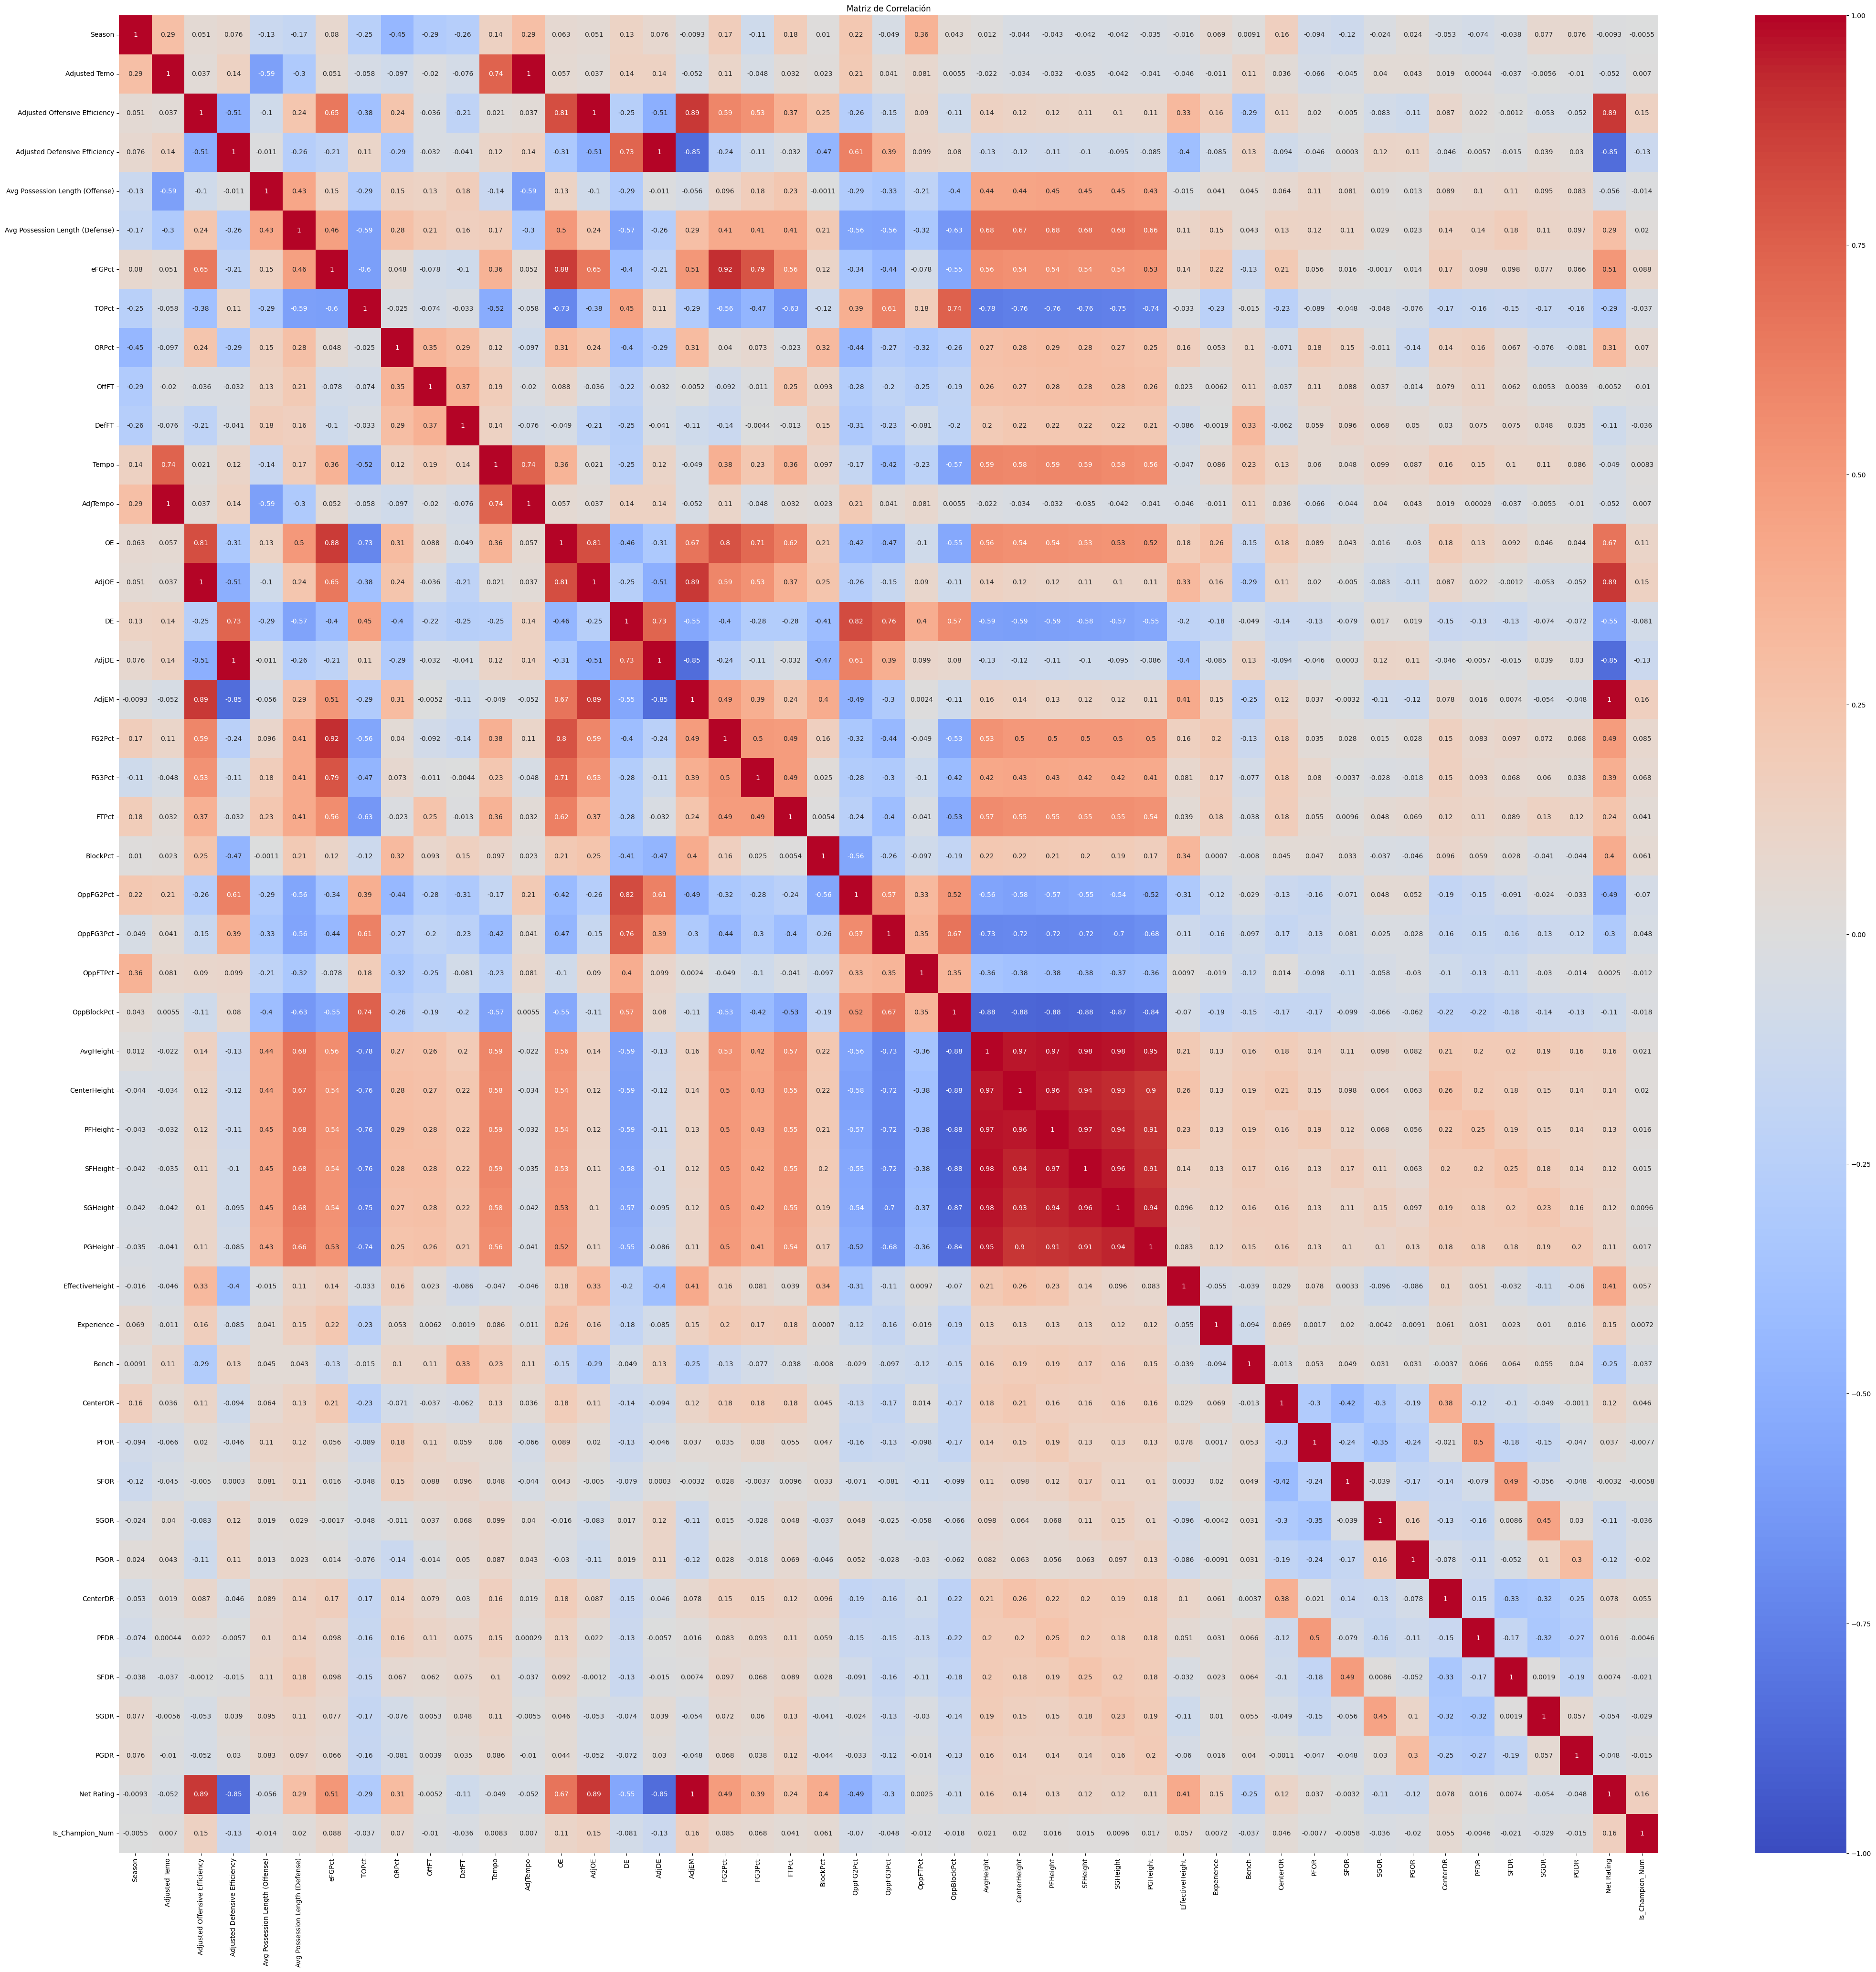

In [29]:
# Calcular la matriz de correlación
MarchMad_corr = Col_Num.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(52, 50))

# Crear el mapa de calor
sns.heatmap(MarchMad_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Ajustar el título y mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

El tamaño de la matriz de correlación es bastante grande, pero con el mapa de calor nos hacemos una idea de como se distribuye esta variable, es una visual bastante útil.

In [30]:
pearson_corr = March_Madness_df['Net Rating'].corr(March_Madness_df['Is_Champion_Num'])
print(f"Correlación de Pearson entre Net Rating y Is_Champion_Num: {pearson_corr:.2f}")

Correlación de Pearson entre Net Rating y Is_Champion_Num: 0.16


In [42]:
# Vamos a ver una tabla con las correlaciones más altas ente variables
# Establecer umbral de correlación alta
umbral = 0.85

# Obtener pares de variables con correlación mayor a 0.8, eliminando duplicados y la diagonal
high_corr = MarchMad_corr[(MarchMad_corr.abs() > umbral) & (MarchMad_corr < 0.99)]

# Mostrar pares de variables con alta correlación
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Mostrar las variables
high_corr_pairs.sort_values('Correlación', ascending=False)


,Variable 1,Variable 2,Correlación
18,AvgHeight,SFHeight,0.976715
34,SFHeight,AvgHeight,0.976715
40,SGHeight,AvgHeight,0.975397
19,AvgHeight,SGHeight,0.975397
17,AvgHeight,PFHeight,0.974803
28,PFHeight,AvgHeight,0.974803
30,PFHeight,SFHeight,0.967271
36,SFHeight,PFHeight,0.967271
22,CenterHeight,AvgHeight,0.965970
16,AvgHeight,CenterHeight,0.965970


In [43]:
from scipy.stats import spearmanr

# Calcular la correlación de Spearman entre Net Rating e Is_Champion_Num
spearman_corr, _ = spearmanr(March_Madness_df['Net Rating'], March_Madness_df['Is_Champion_Num'])

print(f"Correlación de Spearman entre Net Rating e Is_Champion_Num: {spearman_corr}")


Correlación de Spearman entre Net Rating e Is_Champion_Num: 0.11578850044670755


In [47]:
# Seleccionar las variables que quieres analizar
variables = ['Net Rating', 'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency',
             'FG2Pct', 'FG3Pct', 'OppFG2Pct', 'OppFG3Pct', 'BlockPct', 'OppBlockPct',
             'CenterOR', 'PFOR', 'SFOR', 'SGOR', 'PGOR','CenterDR', 'PFDR', 'SFDR', 'SGDR', 'PGDR',
             'Avg Possession Length (Offense)', 'Avg Possession Length (Defense)' ]

# Crear un DataFrame para las variables seleccionadas y la columna objetivo (Is_Champion_Num)
variables_elegidas = March_Madness_df[variables + ['Is_Champion_Num']]

# Calcular la correlación de Spearman para todas las variables
spearman_corr = variables_elegidas.corr(method='spearman')

# Mostrar la correlación de cada variable con respecto a Is_Champion_Num
print("Correlación de Spearman con Is_Champion_Num:")
print(spearman_corr['Is_Champion_Num'].sort_values(ascending=False))

Correlación de Spearman con Is_Champion_Num:
Is_Champion_Num                    1.000000
Net Rating                         0.115789
Adjusted Offensive Efficiency      0.109916
FG2Pct                             0.082251
FG3Pct                             0.065642
CenterDR                           0.059578
CenterOR                           0.052146
BlockPct                           0.048380
Avg Possession Length (Defense)    0.035499
PFDR                              -0.001904
PFOR                              -0.007841
SFOR                              -0.011064
Avg Possession Length (Offense)   -0.016645
PGDR                              -0.017693
PGOR                              -0.019188
SFDR                              -0.025497
SGDR                              -0.033360
SGOR                              -0.040411
OppBlockPct                       -0.043021
OppFG3Pct                         -0.062822
OppFG2Pct                         -0.079942
Adjusted Defensive Efficiency  

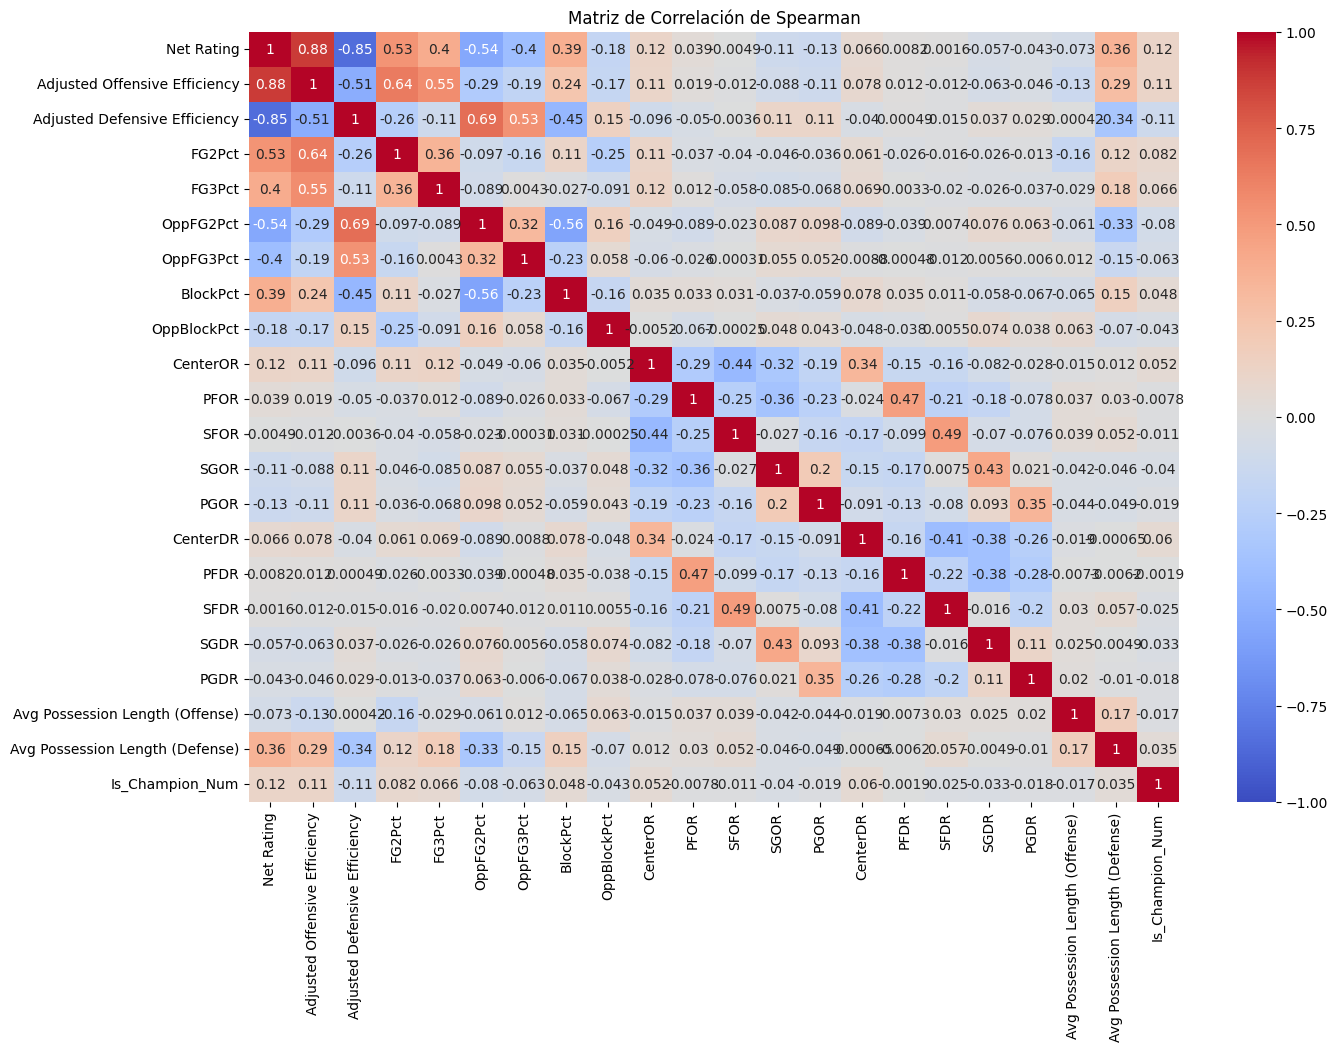

In [49]:
corr_matriz_sp = variables_elegidas.corr(method='spearman')

# Graficar un heatmap de las correlaciones
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matriz_sp, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Spearman')
plt.show()


2.  **En este segundo bloque, vamos a centrarnos en analizar unas cuantas variables.**



Conferencias distintas:  33
Equipos por conferencia:  Conference
Atlantic 10 Conference (A-10)                15
Atlantic Coast Conference (ACC)              15
American Athletic Conference (AAC)           14
Big 12 Conference                            14
Sun Belt Conference (SBC)                    14
Southeastern Conference (SEC)                14
Big Ten Conference (Big 10)                  14
Coastal Athletic Association (CAA)           14
Mid-American Conference (MAC)                12
Atlantic Sun Conference (ASUN)               12
Southwestern Conference (SWC)                12
Pac-12 Conference                            12
Missouri Valley Conference (MVC)             12
Ohio Valley Conference (OVC, The Valley)     11
Mountain West Conference (MW)                11
Metro Atlantic Athletic Conference (MAAC)    11
Western Athletic Conference (WAC)            11
Big West Conference (BWC)                    11
Big East Conference                          11
Horizon League         

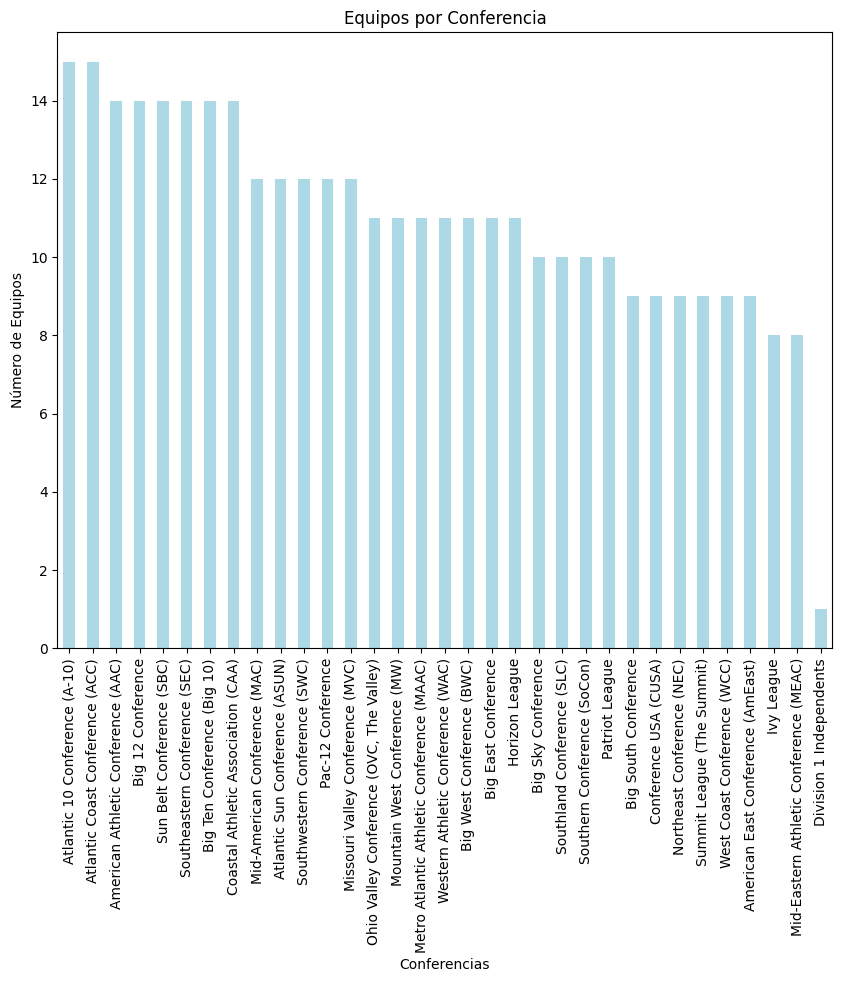

Figure(1000x800)


In [50]:
# Vamos a ver cuantas conferencias distitntas hay, y cuales tienen más equipos.
print("Conferencias distintas: ", March_Madness_df['Conference'].nunique())
equipos_por_conferencia = March_Madness_df.groupby('Conference')['Team Name'].nunique().sort_values(ascending=False)
print("Equipos por conferencia: ",equipos_por_conferencia)

# Voy a meterlo en una visual para que se vea más claro
visual_conf = plt.figure(figsize=(10, 8)); equipos_por_conferencia.plot(kind='bar', color='lightblue'); plt.title('Equipos por Conferencia'); plt.xlabel('Conferencias'); plt.ylabel('Número de Equipos'); plt.show()
print(visual_conf)

Se puede apreciar por el gráfico, quw están bastante escalonadas las conferencias. La única conferencia que llama la atención es la Division 1 Independents que contiene a los Chicago St.

In [51]:
#Aquí comprobamos que es verdad que la division 1 Independents, tiene 1 equipo
March_Madness_df[March_Madness_df['Conference'] == 'Division 1 Independents']

,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,...,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion,Is_Champion_Num
4286,2007,Chicago State,Division 1 Independents,68.2,107.3,112.1,18.3,18.5,0.481329,0.203228,...,6.34,13.97,30.43,26.14,15.07,16.05,12.32,-4.8,No Llega,0
4541,2009,Chicago State,Division 1 Independents,74.2,106.0,112.0,18.0,17.9,0.513416,0.197927,...,10.82,8.22,27.06,24.48,16.48,16.97,15.01,-6.0,No Llega,0
4742,2006,Chicago State,Division 1 Independents,65.3,101.2,108.1,19.3,19.8,0.474883,0.199015,...,12.82,9.51,25.68,28.08,15.94,15.74,14.56,-6.9,No Llega,0
5026,2005,Chicago State,Division 1 Independents,65.5,97.1,105.2,18.2,16.9,0.478934,0.204189,...,22.11,4.34,17.83,21.47,25.29,20.63,14.78,-8.1,No Llega,0
5255,2008,Chicago State,Division 1 Independents,70.9,102.3,111.6,20.6,18.1,0.498989,0.225742,...,22.79,15.04,24.81,22.44,16.94,21.09,14.73,-9.3,No Llega,0
5409,2024,Chicago State,Division 1 Independents,64.6,100.3,110.4,18.1,17.8,0.461272,0.200819,...,21.86,11.71,24.50,28.51,20.29,16.79,9.88,-10.1,No Llega,0
5458,2023,Chicago State,Division 1 Independents,64.2,102.9,113.3,18.2,17.9,0.487559,0.213276,...,11.92,15.33,18.26,26.97,21.59,16.83,16.25,-10.4,No Llega,0
5625,2014,Chicago State,Division 1 Independents,67.8,98.1,109.4,17.2,17.4,0.468079,0.171434,...,17.84,13.36,31.72,17.91,19.96,18.71,11.70,-11.3,No Llega,0
5825,2013,Chicago State,Division 1 Independents,65.5,91.1,103.7,18.4,16.9,0.443827,0.211766,...,15.39,9.35,30.07,24.15,19.33,14.21,12.24,-12.6,No Llega,0
6363,2022,Chicago State,Division 1 Independents,65.6,95.5,113.1,18.2,17.3,0.458426,0.220622,...,8.09,9.34,24.90,28.32,20.57,11.35,14.86,-17.6,No Llega,0


In [52]:
# Vamos a empezar viendo la evolución anual del conjunto de equipos en cuanto a eficiencia ofensiva y ofensiva.
# Media, mediana y desviación estándar de la eficiencia ofensiva y defensiva
estad_off = March_Madness_df['Adjusted Offensive Efficiency'].agg(['mean', 'median', 'std'])
estad_def = March_Madness_df['Adjusted Defensive Efficiency'].agg(['mean', 'median', 'std'])

print("Eficiencia Ofensiva:")
print(estad_off)

print("Eficiencia Defensiva:")
print(estad_def)


Eficiencia Ofensiva:
mean      103.826097
median    103.700000
std         7.363501
Name: Adjusted Offensive Efficiency, dtype: float64
Eficiencia Defensiva:
mean      103.564312
median    103.700000
std         6.440918
Name: Adjusted Defensive Efficiency, dtype: float64


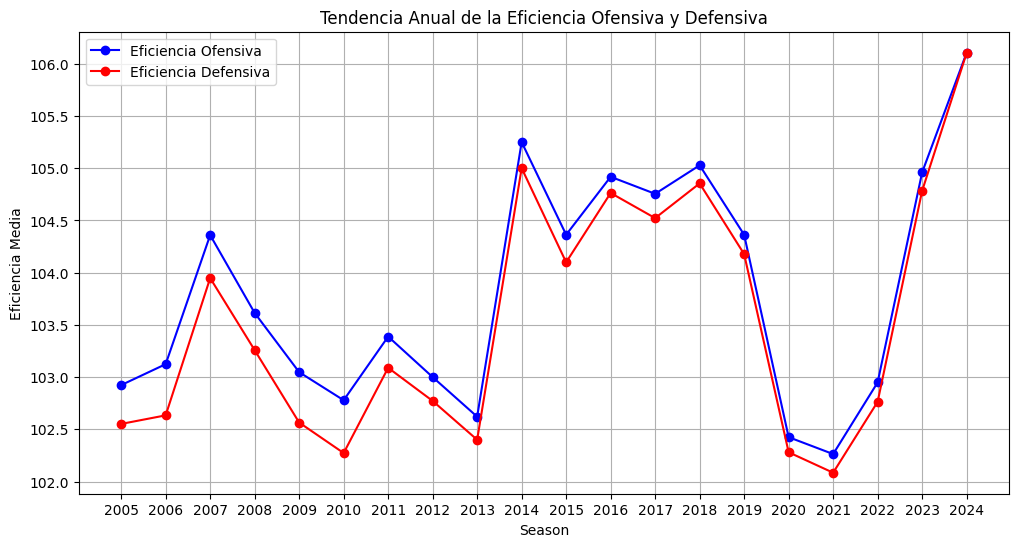

In [57]:
# Calcular la media anual de eficiencia ofensiva y defensiva
mean_offensive_efficiency = March_Madness_df.groupby('Season')['Adjusted Offensive Efficiency'].mean()
mean_defensive_efficiency = March_Madness_df.groupby('Season')['Adjusted Defensive Efficiency'].mean()

plt.figure(figsize=(12, 6))

# Graficar la media de la eficiencia ofensiva
plt.plot(
    mean_offensive_efficiency.index,
    mean_offensive_efficiency,
    linestyle='-', marker='o', label='Eficiencia Ofensiva', color='blue'
)

# Graficar la media de la eficiencia defensiva
plt.plot(
    mean_defensive_efficiency.index,
    mean_defensive_efficiency,
    linestyle='-', marker='o', label='Eficiencia Defensiva', color='red'
)

# Configuraciones del gráfico
plt.title('Tendencia Anual de la Eficiencia Ofensiva y Defensiva')
plt.xlabel('Season')
plt.ylabel('Eficiencia Media')
plt.xticks(mean_offensive_efficiency.index)  # Muestre las temporadas
y_min = min(mean_offensive_efficiency.min(), mean_defensive_efficiency.min())
y_max = max(mean_offensive_efficiency.max(), mean_defensive_efficiency.max())
y_ticks = np.arange(np.floor(y_min), np.ceil(y_max) + 2, 1.5)  # Ajusto los saltos
plt.legend()
plt.grid(True)
# Mostrar el gráfico
plt.show()

El gráfico nos muestra lo que hemos podido ver más arriba al sacar las medias de todas las variables, al final la eficiencia ofensiva y defensiva está muy pareja.

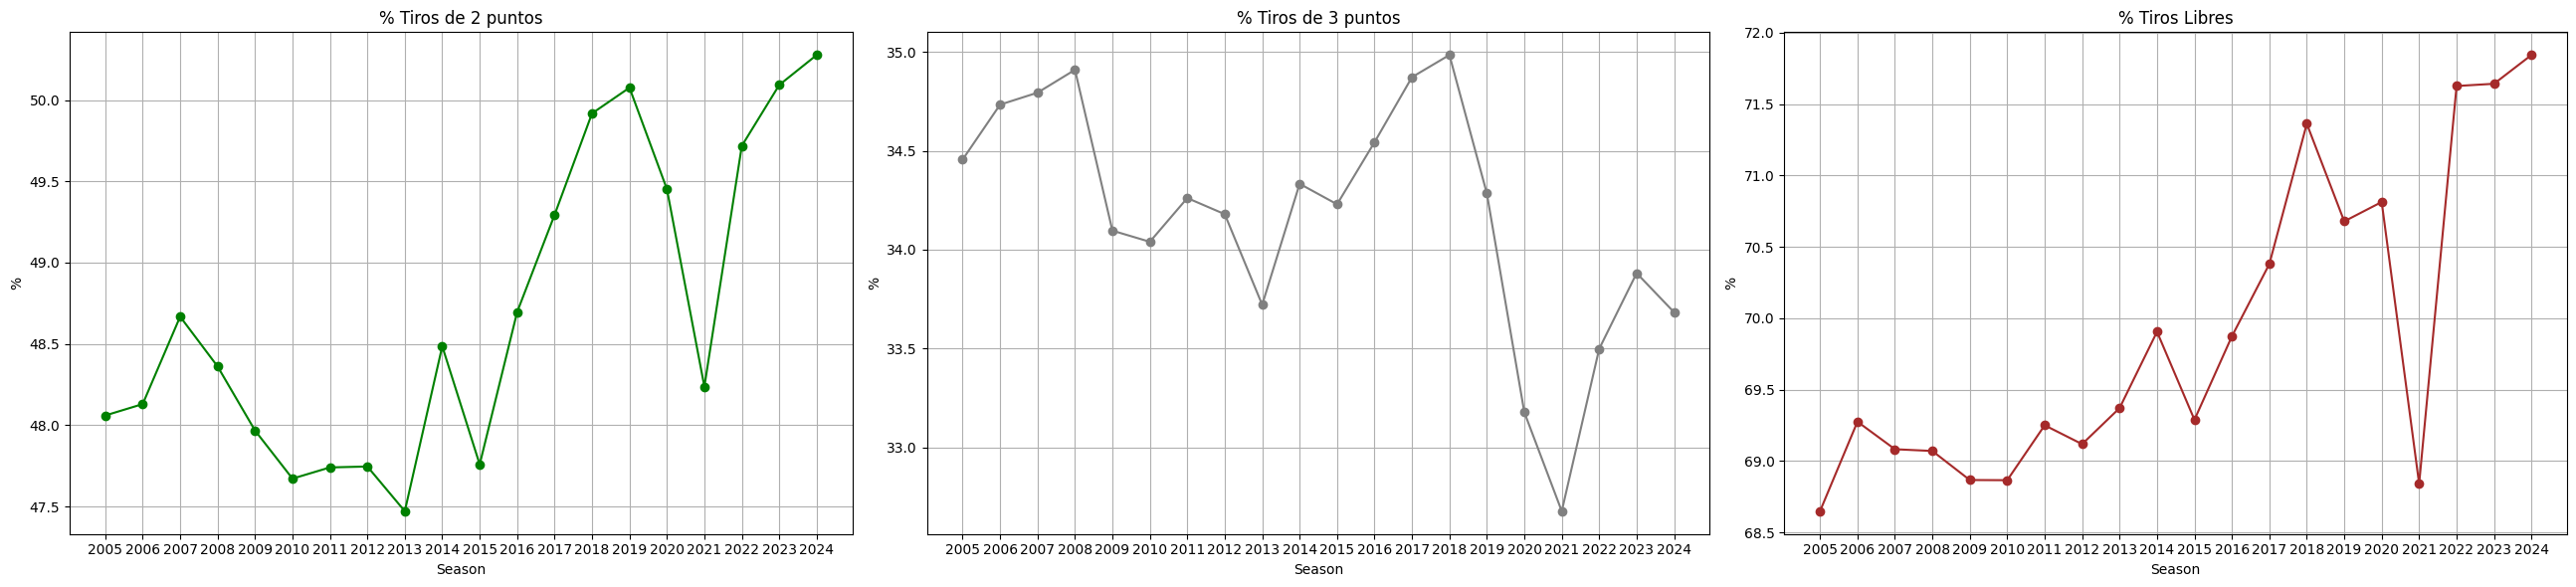

In [67]:
# Creamos una gráfica como la de antes, pero con FG2Pct y FG3Pct
media_FG2 = March_Madness_df.groupby('Season')['FG2Pct'].mean()*100
media_FG3 = March_Madness_df.groupby('Season')['FG3Pct'].mean()*100
media_FT = March_Madness_df.groupby('Season')['FTPct'].mean()*100

plt.figure(figsize=(26, 6))

# Gráfico para % Tiros de 2 puntos
plt.subplot(1, 3, 1)
plt.plot(
    media_FG2.index,
    media_FG2,
    linestyle='-', marker='o', color='green'
)
plt.title('% Tiros de 2 puntos')
plt.xlabel('Season')
plt.ylabel('%')
plt.xticks(media_FG2.index)
plt.grid(True)

# Gráfico para % Tiros de 3 puntos
plt.subplot(1, 3, 2)
plt.plot(
    media_FG3.index,
    media_FG3,
    linestyle='-', marker='o', color='grey'
)
plt.title('% Tiros de 3 puntos')
plt.xlabel('Season')
plt.ylabel('%')
plt.xticks(media_FG3.index)
plt.grid(True)

# Gráfico para % Tiros Libres
plt.subplot(1, 3, 3)
plt.plot(
    media_FT.index,
    media_FT,
    linestyle='-', marker='o', color='brown'
)
plt.title('% Tiros Libres')
plt.xlabel('Season')
plt.ylabel('%')
plt.xticks(media_FT.index)
plt.grid(True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

<ipython-input-58-77ba0f203d38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=March_Madness_df, x='Season', y='Adjusted Offensive Efficiency', palette='viridis')


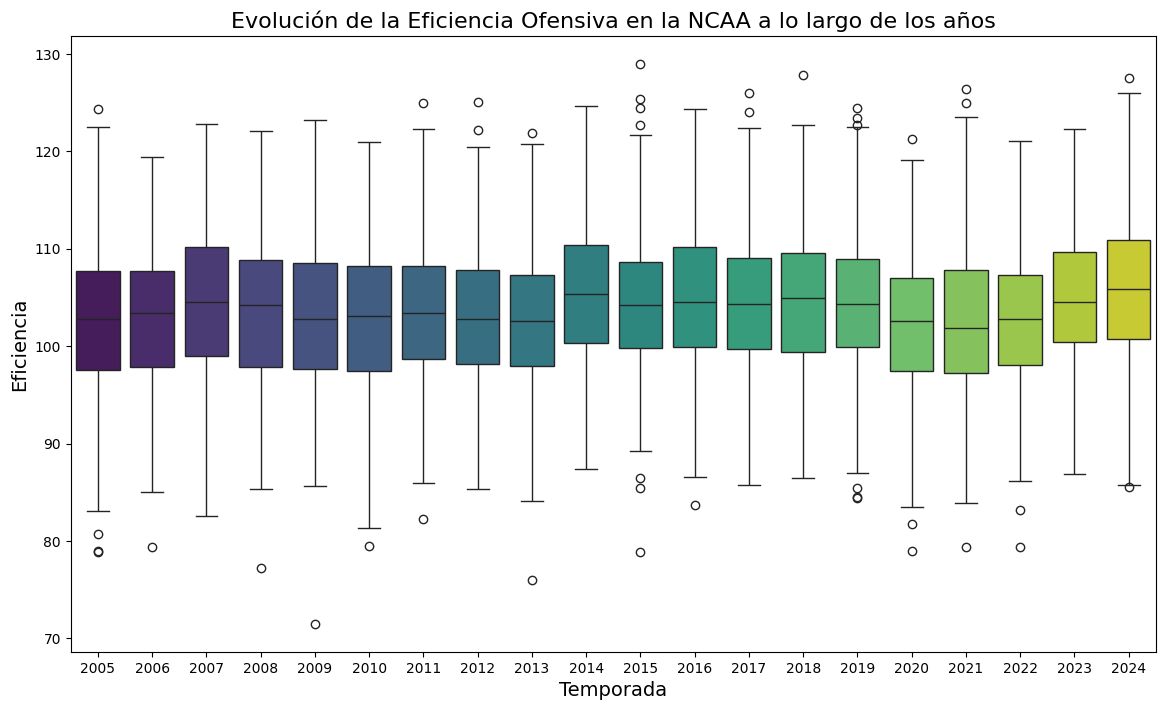

In [58]:
# Vemos un poco más en detalle las tendencias ofensivas y defensivas. Vamos con la Ofensiva
# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

# Nube de puntos para la eficiencia ofensiva a lo largo de los años
sns.boxplot(data=March_Madness_df, x='Season', y='Adjusted Offensive Efficiency', palette='viridis')



# Configurar título y etiquetas de los ejes
plt.title('Evolución de la Eficiencia Ofensiva en la NCAA a lo largo de los años', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Eficiencia', fontsize=14)

# Mostrar gráfico
plt.show()


<ipython-input-59-25bd62a0ff80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=March_Madness_df, x='Season', y='Adjusted Defensive Efficiency', palette='viridis')


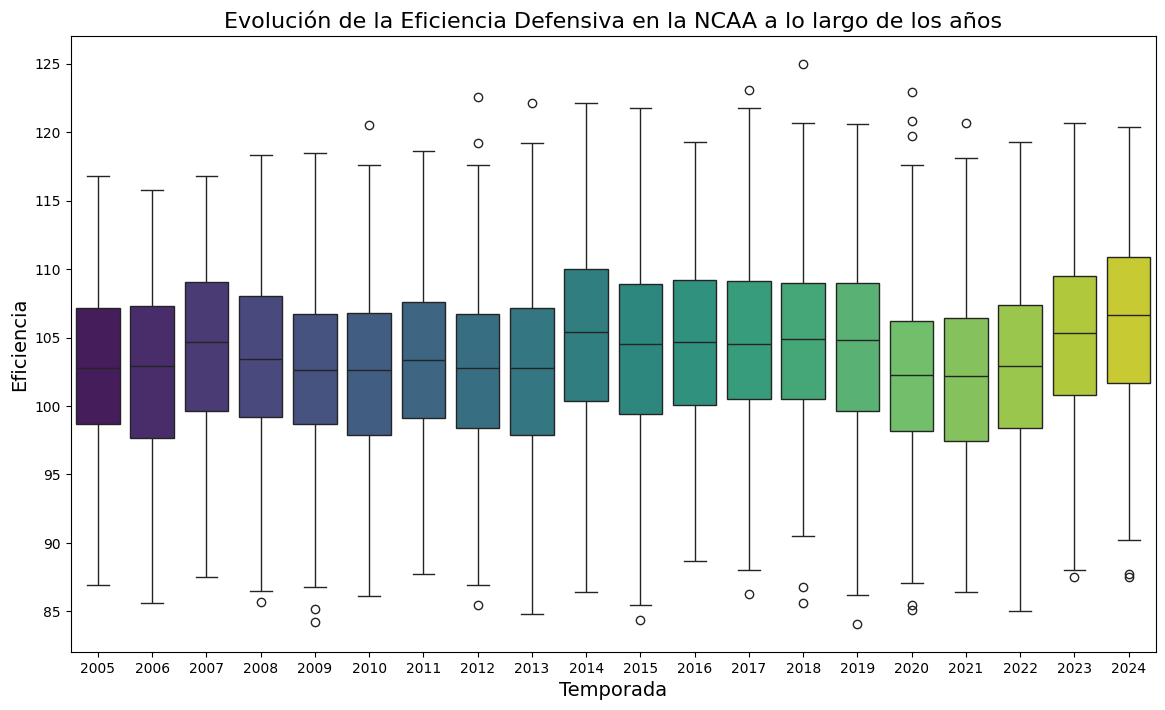

In [59]:
# Vamos ahora con la defensiva
# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

# Nube de puntos para la eficiencia ofensiva a lo largo de los años
sns.boxplot(data=March_Madness_df, x='Season', y='Adjusted Defensive Efficiency', palette='viridis')

# Configurar título y etiquetas de los ejes
plt.title('Evolución de la Eficiencia Defensiva en la NCAA a lo largo de los años', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Eficiencia', fontsize=14)

# Mostrar gráfico
plt.show()

In [60]:
# Vamos a ver cuales han sido los mejores equipos en estas tendencias
# Equipos con mejor eficiencia ofensiva
Top_off = March_Madness_df.sort_values('Adjusted Offensive Efficiency', ascending=False).head(10)

# Equipos con mejor eficiencia defensiva
Top_def = March_Madness_df.sort_values('Adjusted Defensive Efficiency').head(10)

print("Mejores Equipos Ofensivos:")
print(Top_off[['Season', 'Team Name', 'Adjusted Offensive Efficiency']])

print("Mejores Equipos Defensivos:")
print(Top_def[['Season', 'Team Name', 'Adjusted Defensive Efficiency']])


Mejores Equipos Ofensivos:
     Season       Team Name  Adjusted Offensive Efficiency
6      2015       Wisconsin                          129.0
7      2018       Villanova                          127.8
2      2024           UConn                          127.5
1      2021         Gonzaga                          126.4
241    2017  Oklahoma State                          126.0
224    2024         Alabama                          126.0
161    2024        Illinois                          125.5
143    2015      Notre Dame                          125.4
30     2024          Purdue                          125.2
130    2012        Missouri                          125.1
Mejores Equipos Defensivos:
     Season   Team Name  Adjusted Defensive Efficiency
36     2019  Texas Tech                           84.1
53     2009     Memphis                           84.2
0      2015    Kentucky                           84.4
10     2013  Louisville                           84.8
116    2022  Texas Te

Si nos fijamos en nuestro Top10 de ambas categorías, son los outliers que tenemos enla gráfica previa.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=March_Madness_df, x='Adjusted Offensive Efficiency', y='Adjusted Defensive Efficiency', hue='Season')

plt.title('Eficiencia Ofensiva vs. Eficiencia Defensiva')
plt.xlabel('Eficiencia Ofensiva Ajustada')
plt.ylabel('Eficiencia Defensiva Ajustada')
plt.legend(title='Season', loc='upper right')
plt.show()


Otra opción de ver que realmente es bastante pareja la eficiencia entre años, es ver esta nube de puntos, en general muy concentrados.

In [ ]:
# Visto esta tendencia nos vamos a centrar en la diferencia, el Net Rating
# Equipos con las mayores diferencias
Top_net = March_Madness_df.sort_values('Net Rating', ascending=False).head(10)

print("Equipos con mayor diferencia positiva en eficiencia (Ofensiva - Defensiva):")
print(Top_net[['Season', 'Team Name', 'Net Rating']])

In [ ]:
# Visto esta tendencia nos vamos a centrar en la diferencia, el Net Rating
# Equipos con las mayores diferencias
Top_net = March_Madness_df.sort_values('Net Rating', ascending=True).head(10)

print("Equipos con mayor diferencia negativa en eficiencia (Ofensiva - Defensiva):")
print(Top_net[['Season', 'Team Name', 'Net Rating']])

In [ ]:
# Encontrar conferencias que están en ambos top 10
Mejores_Equipos = pd.merge(Top_off.nlargest(10, 'Adjusted Offensive Efficiency'),Top_def.nsmallest(10, 'Adjusted Defensive Efficiency') , on='Team Name')

print("Las conferencias que se encuentran tanto en el top 10 de eficiencia ofensiva como defensiva son:")
print(Mejores_Equipos)

In [ ]:
# Equipos en el Top30
# Equipos con mejor eficiencia ofensiva
Top_off_v2 = March_Madness_df.sort_values('Adjusted Offensive Efficiency', ascending=False).head(30)

# Equipos con mejor eficiencia defensiva
Top_def_v2 = March_Madness_df.sort_values('Adjusted Defensive Efficiency').nsmallest(30, 'Adjusted Defensive Efficiency')

# Encontrar equipos que están en el top 30 tanto en eficiencia ofensiva como en defensiva
Mejores_Equipos = pd.merge(Top_off_v2, Top_def_v2, on='Team Name')

# Seleccionar solo el nombre del equipo, año y conferencia
Mejores_Equipos_info = Mejores_Equipos[['Team Name', 'Season_x', 'Conference_x', 'Net Rating_x']]

# Renombrar columnas para mayor claridad
Mejores_Equipos_info.columns = ['Team Name', 'Season', 'Conference','Net Rating']

# Eliminar duplicados
Mejores_Equipos_info = Mejores_Equipos_info.drop_duplicates()

print("Las conferencias que se encuentran tanto en el top 30 de eficiencia ofensiva como defensiva son:")
print(Mejores_Equipos_info.sort_values('Season'))

Si vemos la lista de campeones de los últimos años, equipos que hayan ganado estando en ambas listas, tenemos Florida y Virginia.
Se podría decir que estos son los equipos más completos de la historia de la liga.
Más adelante analizaremos que han hecho estos equipos.

Vamos a analizar si la conferencia influye en las capacidades ofensivas o defensivas.

In [ ]:
# Agrupamos por conferencia y calculamos la media de la eficiencia ofensiva y defensiva
conference_stats = March_Madness_df.groupby('Conference')[['Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 'Net Rating']].mean()

# Ver los primeros resultados
print(conference_stats)


In [ ]:
# Configurar el tamaño de la gráfica
plt.figure(figsize=(16, 10))

# Crear un gráfico de barras para la eficiencia ofensiva
plt.subplot(3, 1, 1)
sns.barplot(data=conference_stats, x='Adjusted Offensive Efficiency', y='Conference', palette='Blues_d')
plt.title('Eficiencia Ofensiva Promedio por Conferencia')
plt.xlabel('Eficiencia Ofensiva Ajustada')
plt.ylabel('Conferencia')

# Crear un gráfico de barras para la eficiencia defensiva
plt.subplot(3, 1, 2)
sns.barplot(data=conference_stats, x='Adjusted Defensive Efficiency', y='Conference', palette='Reds_d')
plt.title('Eficiencia Defensiva Promedio por Conferencia')
plt.xlabel('Eficiencia Defensiva Ajustada')
plt.ylabel('Conferencia')

# Crear un gráfico de barras para la eficiencia defensiva
plt.subplot(3, 1, 3)
sns.barplot(data=conference_stats, x='Net Rating', y='Conference', palette='Greens_d')
plt.title('Net Rating Promedio por Conferencia')
plt.xlabel('Net Rating')
plt.ylabel('Conferencia')

# Ajustar el layout para que no se sobrepongan los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [ ]:
print("Las conferencias con más eficiencia ofensiva :",conference_stats.nlargest(5, 'Adjusted Offensive Efficiency'))
print("Las conferencias con más eficiencia defensiva :",conference_stats.nlargest(5, 'Adjusted Defensive Efficiency'))
print("Las conferencias con un valor de Net Rating positivo son: ",conference_stats[conference_stats['Net Rating'] > 0])

In [ ]:
# Encontrar conferencias que están en ambos top 10
Mejores_Conferencias = pd.merge(conference_stats.nlargest(3, 'Adjusted Offensive Efficiency'),conference_stats.nsmallest(3, 'Adjusted Defensive Efficiency') , on='Conference')
print("Las conferencias que se encuentran tanto en el top 10 de eficiencia ofensiva como defensiva son:")
print(Mejores_Conferencias['Net Rating_x'])

Estas son las dos conferencias que se encuentran en el top de cada categoría. Son las dos con mejor Net Rating.

In [ ]:
# Vamos a pasar a ver que equipos de nuestra lista han llegado a la final
finalists_stats = pd.merge(March_Madness_df, Finalistas_df, on=['Team Name', 'Season'])
print(finalists_stats.sort_values('Net Rating', ascending=False) )

In [ ]:
# Vamos a ver que equipos están el top de equipos
finalists_top = pd.merge(Mejores_Equipos_info, Finalistas_df, on=['Team Name', 'Season'])
print(finalists_top)

In [ ]:
# Vamos a ver que equipos están el top de equipos
finalists_top = pd.merge(March_Madness_df.sort_values('Net Rating', ascending=False).head(30), Finalistas_df, on=['Team Name', 'Season'])
print(finalists_top)

In [ ]:
# De los mejores equipos según el Net Rating, cuantos si han sido campeones
Campeones_Top = finalists_top[finalists_top['Is_Champion'] == 'Si']
print(Campeones_Top)

In [ ]:
# Vamos a ver los ORs por posición
positions = ['PG', 'SG', 'SF', 'PF', 'Center']
Campeones_Top['Team_Season'] = Campeones_Top['Team Name'] + '-' + Campeones_Top['Season'].astype(str)
# Crear una figura y un conjunto de subgráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, position in enumerate(positions):
    row, col = divmod(i, 3)

    # Filtrar las columnas relevantes para OR y DR de la posición
    or_column = f'{position}OR'
    dr_column = f'{position}DR'

    # Crear gráfico de barras para OR y DR
    Campeones_Top.plot(kind='bar', x='Team_Season', y=[or_column, dr_column], ax=axes[row, col], color=['blue', 'orange'])

    # Título para cada gráfico
    axes[row, col].set_title(f'{position} - Offensive & Defensive Ratings')
    axes[row, col].set_ylabel('Rating')
    axes[row, col].set_xlabel('Team_Season')
    axes[row, col].set_ylim(0, 50)


# Calcular la media de los titulares para cada equipo
Campeones_Top['Media_OR'] = Campeones_Top[[f'{pos}OR' for pos in positions]].sum(axis=1)
Campeones_Top['Media_DR'] = Campeones_Top[[f'{pos}DR' for pos in positions]].sum(axis=1)

# Graficar la media de los titulares en el subgráfico vacío
Campeones_Top.plot(kind='bar', x='Team_Season', y=['Bench'], ax=axes[1, 2], color=['green'])

# Título para la gráfica de la media de los titulares
axes[1, 2].set_title('Bench - Offensive & Defensive Ratings')
axes[1, 2].set_ylabel('Rating')
axes[1, 2].set_xlabel('Team Season')
axes[1, 2].set_ylim(0, 50)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el conjunto de gráficos
plt.show()

Es curioso ver como el peso tanto ofensivo como defensivo cae más en los jugadores como el Ala-Pivot o el Pivot, esto se debe a que sus tiros son de un % mayor.